# Modeling

## Imports

In [1]:
# Imported Libraries 
import pandas as pd # pandas library 
import numpy as np # numpy library
import matplotlib.pyplot as plt # Import the pyplot (pythonplot) part of the matlotlib library
import seaborn as sns # seaborn library

from sklearn.model_selection import train_test_split # Train, Validation, Test Split
from sklearn.preprocessing import StandardScaler # Standard Scaling
from sklearn.linear_model import LogisticRegression # Logistic Regression Imports
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


#from mlxtend.plotting import plot_decision_regions # for visualising classification decision boundaries in 2D


## Helper Functions

In [35]:
def show_high_corr_pairs(corr_matrix, threshold=0.5):
    '''
    
    '''
    high_corr_pairs = corr_matrix[(corr_matrix.abs() >= 0.5) & (corr_matrix != 1.0)]
    high_corr_pairs = high_corr_pairs.dropna(how='all').dropna(axis=1, how='all')

    return high_corr_pairs

## Data Loading

In [2]:
## Data Loading
# Data loading for github only

CLN_DATA_PATH='../data/heart_attack_enc_m.csv'

try:
    heart_attack_enc_m = pd.read_csv(CLN_DATA_PATH, index_col= 0)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("ERROR: The data file does not exist.")

Data loaded successfully.


In [23]:
heart_attack_enc_m.head()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,LastCheckupTime_enc,Gender_enc,GeneralHealth_enc,PhysicalActivities_enc,...,BlindOrVisionDifficulty_enc,DifficultyWalking_enc,DifficultyDressingBathing_enc,DifficultyErrands_enc,ChestScan_enc,AlcoholDrinkers_enc,HIVTesting_enc,FluVaxLast12_enc,PneumoVaxEver_enc,HighRiskLastYear_enc
0,4.0,0.0,9.0,1.60,71.67,27.99,0.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,6.0,1.78,95.25,30.13,0.0,1.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,8.0,1.85,108.86,31.66,0.0,1.0,3.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,5.0,0.0,9.0,1.70,90.72,31.32,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,3.0,15.0,5.0,1.55,79.38,33.07,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [24]:
heart_attack_enc_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246004 entries, 0 to 246012
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PhysicalHealthDays             246004 non-null  float64
 1   MentalHealthDays               246004 non-null  float64
 2   SleepHours                     246004 non-null  float64
 3   HeightInMeters                 246004 non-null  float64
 4   WeightInKilograms              246004 non-null  float64
 5   BMI                            246004 non-null  float64
 6   LastCheckupTime_enc            246004 non-null  float64
 7   Gender_enc                     246004 non-null  float64
 8   GeneralHealth_enc              246004 non-null  float64
 9   PhysicalActivities_enc         246004 non-null  float64
 10  SmokerStatus_enc               246004 non-null  float64
 11  ECigaretteUsage_enc            246004 non-null  float64
 12  AgeCategory_enc                2460

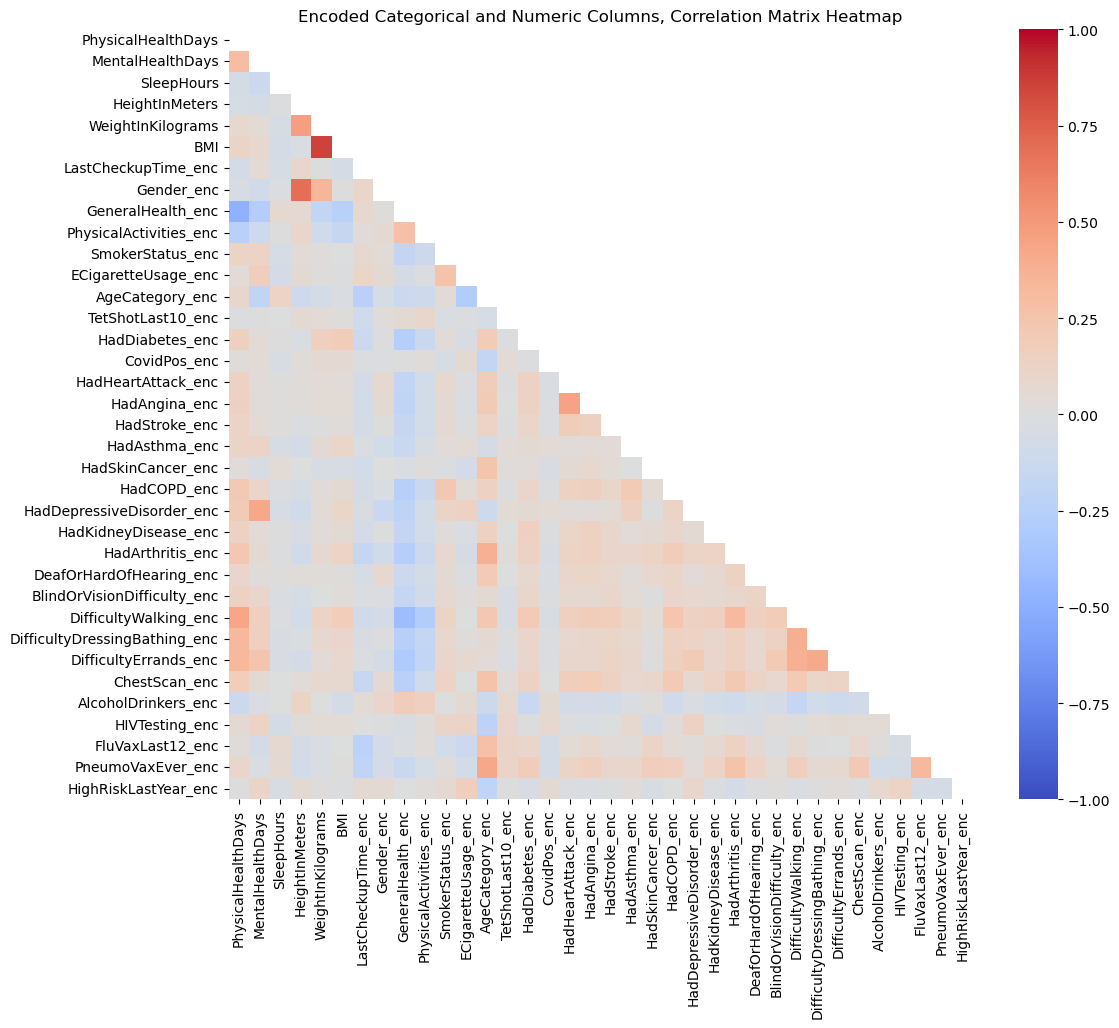

In [25]:
# Select only numerical columns
numeric_columns = heart_attack_enc_m

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,  cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, mask=mask)
plt.title('Encoded Categorical and Numeric Columns, Correlation Matrix Heatmap')
plt.show()

In [36]:
# Printing all the values of the correlation matrix that are above 0.05

high_corr_cols = show_high_corr_pairs(corr_matrix)

print(high_corr_cols)

                   HeightInMeters  WeightInKilograms       BMI  Gender_enc
HeightInMeters                NaN                NaN       NaN    0.693434
WeightInKilograms             NaN                NaN  0.859296         NaN
BMI                           NaN           0.859296       NaN         NaN
Gender_enc               0.693434                NaN       NaN         NaN


## Logistic Regression

In [3]:
#Split into X and y
X = heart_attack_enc_m.drop(columns='HadHeartAttack_enc', axis=1)
y = heart_attack_enc_m['HadHeartAttack_enc']


In [4]:
# Spliting into Remainder and Test (80% : 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12, stratify= y)

In [5]:
# Splitting the remainder in two, train and validation sets (Of the 80% = 80% : 20%)
X_train_subset, X_val, y_train_subset, y_val = train_test_split(X_train, y_train, test_size = 0.2,random_state=12, stratify= y_train) # Always use the same random states.

### Model - Logistic Regression

#### Logistic Regression Model 1 (logreg_model1)

In [58]:
# Instantiate Model
logreg_model1 = LogisticRegression(max_iter=10000)

# Fit
logreg_model1.fit(X_train_subset, y_train_subset)

LogisticRegression(max_iter=10000)

In [68]:
# Creating the train and test predictions

y_train_pred = logreg_model1.predict(X_train_subset)
y_val_pred = logreg_model1.predict(X_val)
y_test_pred = logreg_model1.predict(X_test)


In [69]:
print(f'Logistic Regression Train Score: {logreg_model1.score(X_train, y_train).round(2)}\n')
print(f'Logistic Regression Test Score:{logreg_model1.score(X_test, y_test).round(2)}')

Logistic Regression Train Score: 0.95

Logistic Regression Test Score:0.95


In [70]:
# Classification Report (accuracy, precision, recall, f1)
report_val = classification_report(y_val, y_val_pred)
print(report_val)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     37211
         1.0       0.55      0.25      0.34      2150

    accuracy                           0.95     39361
   macro avg       0.75      0.62      0.66     39361
weighted avg       0.94      0.95      0.94     39361



In [71]:
# Classification Report (accuracy, precision, recall, f1)
report_test = classification_report(y_test, y_test_pred)
print(report_test)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     46514
         1.0       0.55      0.24      0.34      2687

    accuracy                           0.95     49201
   macro avg       0.76      0.62      0.66     49201
weighted avg       0.94      0.95      0.94     49201



Confusion Matrix - Train:
[[147182   1662]
 [  6464   2134]]


<Figure size 800x600 with 0 Axes>

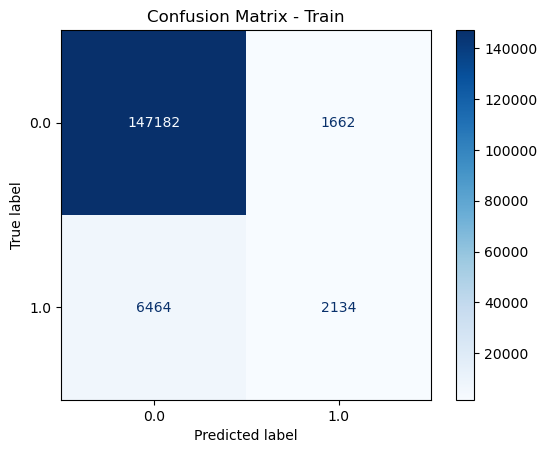

In [73]:
# Generate confusion matrix
cm_lr_train = confusion_matrix(y_train_subset, y_train_pred)
print("Confusion Matrix - Train:")
print(cm_lr_train)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr_train, display_labels=logreg_model1.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Train')
plt.show()


Confusion Matrix - Train:
[[45991   523]
 [ 2035   652]]


<Figure size 800x600 with 0 Axes>

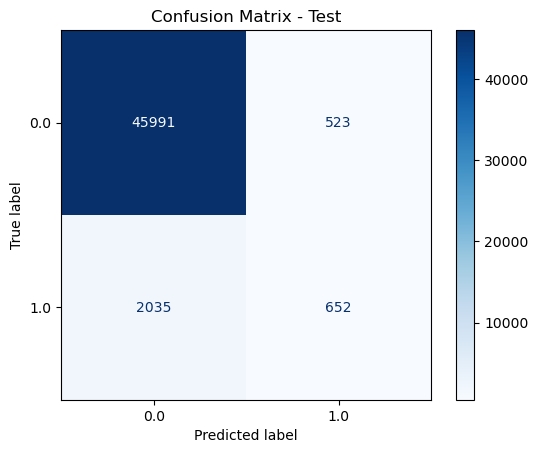

In [75]:
# Generate confusion matrix
cm_lr_train = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix - Train:")
print(cm_lr_train)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr_train, display_labels=logreg_model1.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test')
plt.show()

In [76]:
logreg_coeff = pd.DataFrame(logreg_model1.coef_, columns= X_train.columns, index= ["Coeff"]).T
logreg_coeff.sort_values(by= "Coeff", ascending= False)

,Coeff
HadAngina_enc,2.432695
HadStroke_enc,0.879605
Gender_enc,0.686212
ChestScan_enc,0.575729
HadDiabetes_enc,0.328889
SmokerStatus_enc,0.198884
AgeCategory_enc,0.179019
BlindOrVisionDifficulty_enc,0.138785
DifficultyWalking_enc,0.094504
HIVTesting_enc,0.092302


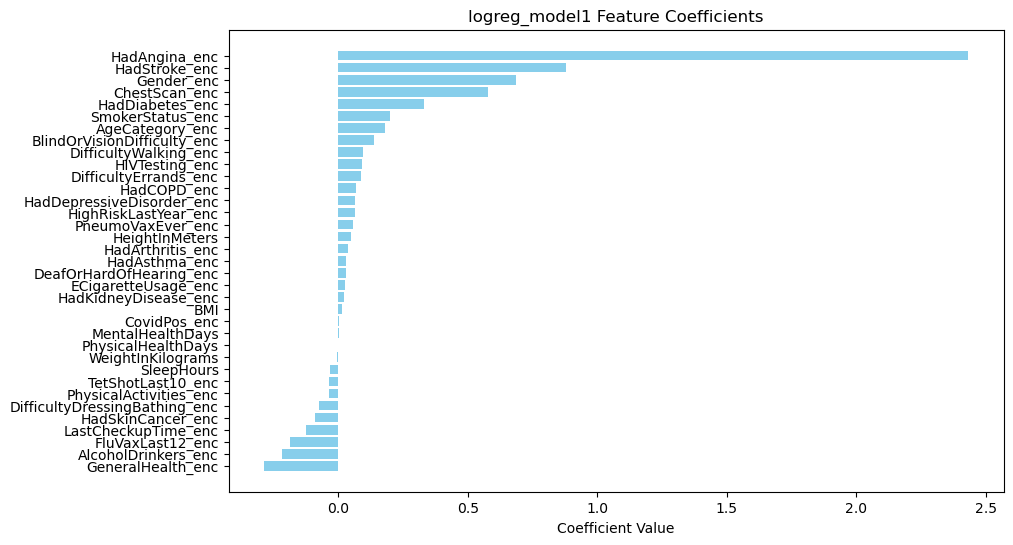

In [83]:
# Combine coefficients and feature names
coef_names = list(zip(coefficients, feature_names))

# Sort coefficients and feature names in descending order
coef_names.sort(reverse=False)

# Separate sorted coefficients and feature names
sorted_coefficients = [coef for coef, name in coef_names]
sorted_feature_names = [name for coef, name in coef_names]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('logreg_model1 Feature Coefficients')
plt.show()

#### Logistic Regression Model 2

Scaling - Logistic Regression Model 2

In [84]:
# Pre-processing - scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [97]:
validation_scores = []
train_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,\
                1,10,100,1000,10000,100000,1000000,10000000, 100000000, 1000000000])

for c in C_range:
    logreg_model2 = LogisticRegression(max_iter=10000, C = c, random_state= 12, n_jobs= 4)
    logreg_model2.fit(X_train_scaled,y_train)
    
    # train on traning set
    train_scores.append(logreg_model2.score(X_train_scaled,y_train))
    # score on validation set
    validation_scores.append(logreg_model2.score(X_val_scaled,y_val))

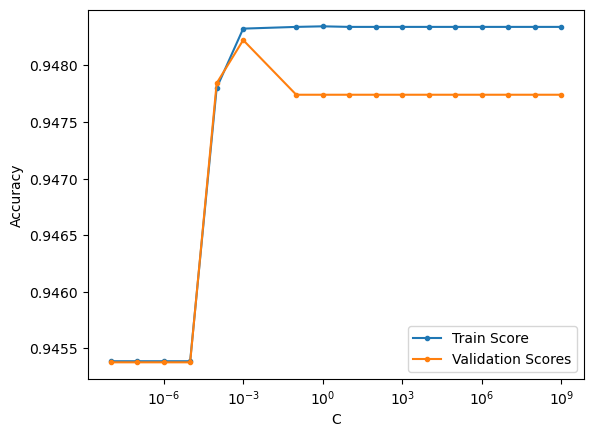

In [98]:
plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='.')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='.')
plt.xscale('log') # logarithmic scale needed on this example
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

**Optimised logreg_model2**

In [100]:
# Optimized C value
opt_C = .001 

# Instantiate Model
opt_logreg_model2 = LogisticRegression(max_iter=10000, C= opt_C, random_state=12)

# Fit
opt_logreg_model2.fit(X_train_scaled, y_train)

LogisticRegression(C=0.001, max_iter=10000, random_state=12)

In [101]:
# Creating the train and test predictions

y_train_pred = opt_logreg_model2.predict(X_train_scaled)
y_val_pred = opt_logreg_model2.predict(X_val_scaled)
y_test_pred = opt_logreg_model2.predict(X_test_scaled)

In [102]:
print(f'Optimized Logistic Regression Train Score: {logreg_model2.score(X_train_scaled, y_train).round(2)}\n')
print(f'Optimized Logistic Regression Validation Score: {logreg_model2.score(X_val_scaled, y_val).round(2)}\n')
print(f'Optimized Logistic Regression Test Score:{logreg_model2.score(X_test_scaled, y_test).round(2)}')

Optimized Logistic Regression Train Score: 0.95

Optimized Logistic Regression Validation Score: 0.95

Optimized Logistic Regression Test Score:0.95


In [103]:
# Classification Report (accuracy, precision, recall, f1)
report_train_opt = classification_report(y_train, y_train_pred)
print(report_train_opt)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97    186055
         1.0       0.57      0.23      0.33     10748

    accuracy                           0.95    196803
   macro avg       0.76      0.61      0.65    196803
weighted avg       0.94      0.95      0.94    196803



In [104]:
# Classification Report (accuracy, precision, recall, f1)
report_test = classification_report(y_test, y_test_pred)
print(report_test)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     46514
         1.0       0.56      0.22      0.32      2687

    accuracy                           0.95     49201
   macro avg       0.76      0.61      0.65     49201
weighted avg       0.93      0.95      0.94     49201



Confusion Matrix - Train:
[[184175   1880]
 [  8290   2458]]


<Figure size 800x600 with 0 Axes>

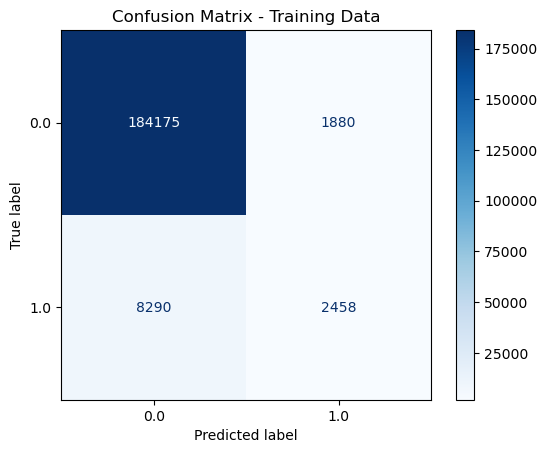

In [114]:
# Confusion Matrix Train Variable
cm_opt_lr_train = confusion_matrix(y_train, y_train_pred)

# Prints Train Confusion Matrix
print("Confusion Matrix - Train:")
print(cm_opt_lr_train)

# Display confusion matrix for training data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_opt_lr_train, display_labels=opt_logreg_model2.classes_)
plt.figure(figsize=(8, 6))
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Training Data')
plt.show()

Confusion Matrix - Train:
[[46040   474]
 [ 2090   597]]


<Figure size 800x600 with 0 Axes>

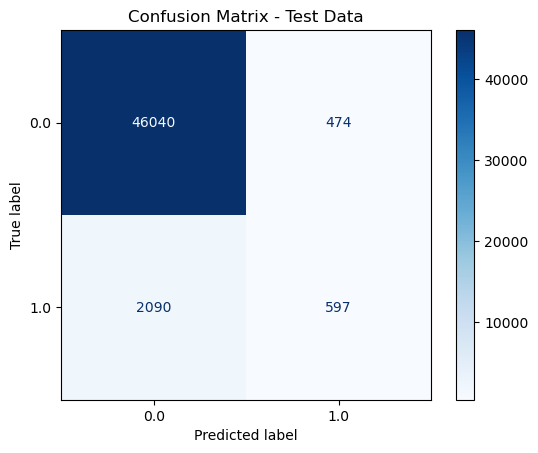

In [115]:
# Confusion Matrix Test Variable
cm_opt_lr_test = confusion_matrix(y_test, y_test_pred)

# Prints Test Confusion Matrix
print("Confusion Matrix - Train:")
print(cm_opt_lr_test)

# Test Confusion Matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_opt_lr_test, display_labels=opt_logreg_model2.classes_)
plt.figure(figsize=(8, 6))
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Data')
plt.show()

In [107]:
opt_logreg_coeff2 = pd.DataFrame(opt_logreg_model2.coef_, columns= X_train.columns, index= ["Coeff"]).T
opt_logreg_coeff2.sort_values(by= "Coeff", ascending= False)

,Coeff
HadAngina_enc,0.571664
AgeCategory_enc,0.457068
Gender_enc,0.290550
ChestScan_enc,0.259435
HadStroke_enc,0.170823
SmokerStatus_enc,0.157425
HadDiabetes_enc,0.116574
PneumoVaxEver_enc,0.049604
DifficultyWalking_enc,0.039285
BlindOrVisionDifficulty_enc,0.031337


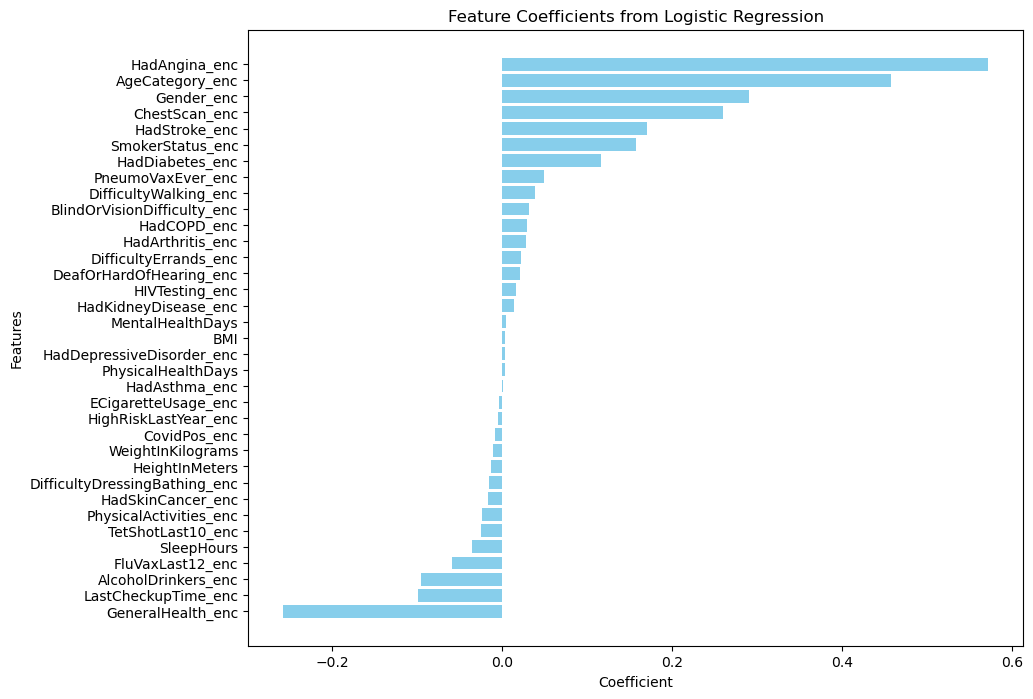

In [109]:
# Sort the DataFrame by coefficient values
opt_logreg_coeff2_sorted = opt_logreg_coeff2.sort_values(by="Coeff", ascending=False)

# Plot coefficients
plt.figure(figsize=(10, 8))
plt.barh(opt_logreg_coeff2_sorted.index, opt_logreg_coeff2_sorted['Coeff'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Feature Coefficients from Logistic Regression')
plt.gca().invert_yaxis()  # To display the highest coefficients on top
plt.show()

Pipeline Gridsearch - logreg_model3

In [116]:
# Making a pipeline esimator list 
lr_estimators = [('scaler', StandardScaler()),
                    ('lr', LogisticRegression(max_iter=1000, random_state=12))
]

pipe = Pipeline(lr_estimators)
print(pipe) # Checking the pipe has been correctly made

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(max_iter=1000, random_state=12))])


In [117]:
# Logistic Regression3 - Defining V1 grid search

C = ([.00000001, .0000001, .000001, .00001, .0001, .001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])

penalty = ['l1', 'l2']

solver = ['saga', 'liblinear']

params = [dict(
    lr = [LogisticRegression()],
    lr__C = C,
    lr__penalty = penalty,
    lr__solver = solver
)]
display(params)

[{'lr': [LogisticRegression()],
  'lr__C': [1e-08,
   1e-07,
   1e-06,
   1e-05,
   0.0001,
   0.001,
   0.1,
   1,
   10,
   100,
   1000,
   10000,
   100000,
   1000000,
   10000000,
   100000000,
   1000000000],
  'lr__penalty': ['l1', 'l2'],
  'lr__solver': ['saga', 'liblinear']}]

In [118]:
# Logistic Regression Grid Search V1
grid_search_model_V1 = GridSearchCV(estimator= pipe, param_grid=params,cv=5, n_jobs= 4, verbose= 2)
grid_search_model_V1.fit(X_train, y_train)

Fitting 5 folds for each of 68 candidates, totalling 340 fits
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.3s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.3s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.3s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.3s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.3s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.3s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.3s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.3s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegress

/opt/anaconda3/envs/capstone/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END lr=LogisticRegression(), lr__C=1000000000, lr__penalty=l1, lr__solver=liblinear; total time=   3.3s
[CV] END lr=LogisticRegression(), lr__C=1000000000, lr__penalty=l2, lr__solver=saga; total time=   1.7s
[CV] END lr=LogisticRegression(), lr__C=1000000000, lr__penalty=l2, lr__solver=saga; total time=   1.8s
[CV] END lr=LogisticRegression(), lr__C=1000000000, lr__penalty=l2, lr__solver=saga; total time=   1.6s
[CV] END lr=LogisticRegression(), lr__C=1000000000, lr__penalty=l2, lr__solver=liblinear; total time=   0.6s
[CV] END lr=LogisticRegression(), lr__C=1000000000, lr__penalty=l2, lr__solver=liblinear; total time=   0.7s
[CV] END lr=LogisticRegression(), lr__C=1000000000, lr__penalty=l2, lr__solver=saga; total time=   1.9s
[CV] END lr=LogisticRegression(), lr__C=1000000000, lr__penalty=l2, lr__solver=liblinear; total time=   0.7s
[CV] END lr=LogisticRegression(), lr__C=1000000000, lr__penalty=l2, lr__solver=saga; total time=   2.2s
[CV] END lr=LogisticRegression(), lr__C=1000

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=12))]),
             n_jobs=4,
             param_grid=[{'lr': [LogisticRegression(C=0.001,
                                                    solver='liblinear')],
                          'lr__C': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                    0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000, 10000000, 100000000, 1000000000],
                          'lr__penalty': ['l1', 'l2'],
                          'lr__solver': ['saga', 'liblinear']}],
             verbose=2)

In [119]:
# Extracting the essential information 

# Result of the grid search optimisation process - best hyperparameter and best model
print('Best Score:', grid_search_model_V1.best_score_); 
print('Best C Value:', grid_search_model_V1.best_estimator_.get_params()['lr__C'])
print('Best lr Model:', grid_search_model_V1.best_estimator_.get_params()['lr'])
print('Best penalty:', grid_search_model_V1.best_estimator_.get_params()['lr__penalty'])
print('Best solver:', grid_search_model_V1.best_estimator_.get_params()['lr__solver'])


Best Score: 0.948334122619001
Best C Value: 0.001
Best lr Model: LogisticRegression(C=0.001, solver='liblinear')
Best penalty: l2
Best solver: liblinear


In [151]:
best_lr_pipe_V1 = grid_search_model_V1.best_estimator_

In [121]:
best_lr_pipe_V1.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [122]:
# Making the train and test predictions for the pipeed decision tree model
y_train_blrpipe_pred = best_lr_pipe_V1.predict(X_train)
y_test_blrpipe_pred = best_lr_pipe_V1.predict(X_test)

In [123]:
# Obtaining the best score on the train and test data for the best pipe model
print(f'Score on train: {best_lr_pipe_V1.score(X_train, y_train)}')
print(f'Score on test: {best_lr_pipe_V1.score(X_test, y_test)}')

Score on train: 0.948298552359466
Score on test: 0.9479888620149997


Train Metrics

In [124]:
# Classification Report (accuracy, precision, recall, f1)
report_blrpipe_train = classification_report(y_train, y_train_blrpipe_pred)
print(report_blrpipe_train)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97    186055
         1.0       0.57      0.23      0.33     10748

    accuracy                           0.95    196803
   macro avg       0.76      0.61      0.65    196803
weighted avg       0.94      0.95      0.94    196803



[[184144   1911]
 [  8264   2484]]


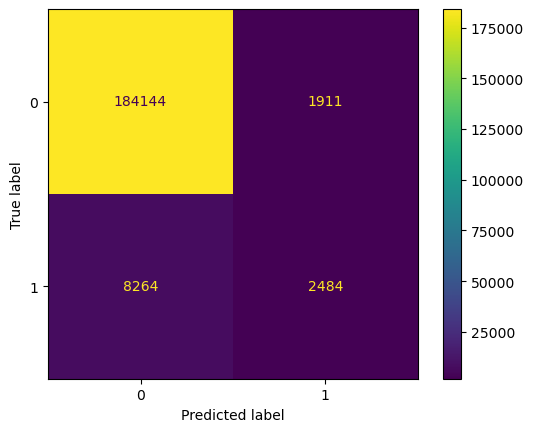

In [125]:
# Confusion Matrix (table + plot)
cm_blrpipe_train = confusion_matrix(y_train, y_train_blrpipe_pred)
print(cm_blrpipe_train)
ConfusionMatrixDisplay(confusion_matrix=cm_blrpipe_train).plot();

In [127]:
# # ROC Curve
# RocCurveDisplay(roc_auc=best_lr_pipe, X_test, y_test);

Test Metrics

In [128]:
# Obtaining the best score from the V1 model
grid_search_model_V1.best_score_

0.948334122619001

In [129]:
# Classification Report (accuracy, precision, recall, f1)
report_blrpipe_test = classification_report(y_test, y_test_blrpipe_pred)
print(report_blrpipe_test)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     46514
         1.0       0.56      0.22      0.32      2687

    accuracy                           0.95     49201
   macro avg       0.76      0.61      0.65     49201
weighted avg       0.93      0.95      0.94     49201



[[46042   472]
 [ 2087   600]]


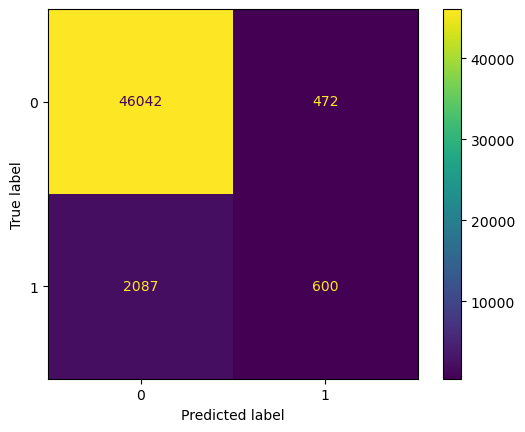

In [130]:
# Confusion Matrix (table + plot)
cm_blrpipe_test = confusion_matrix(y_test, y_test_blrpipe_pred)
print(cm_blrpipe_test)
ConfusionMatrixDisplay(confusion_matrix=cm_blrpipe_test).plot();

In [131]:
print(best_lr_pipe_V1.named_steps)

{'scaler': StandardScaler(), 'lr': LogisticRegression(C=0.001, solver='liblinear')}


                                  Coeff
HadAngina_enc                  0.520527
AgeCategory_enc                0.296907
Gender_enc                     0.221744
ChestScan_enc                  0.178080
HadStroke_enc                  0.151315
SmokerStatus_enc               0.109685
HadDiabetes_enc                0.095197
DifficultyWalking_enc          0.037202
HadCOPD_enc                    0.032197
PneumoVaxEver_enc              0.031883
BlindOrVisionDifficulty_enc    0.025094
DeafOrHardOfHearing_enc        0.020305
DifficultyErrands_enc          0.018635
HadKidneyDisease_enc           0.015840
HIVTesting_enc                 0.011388
HadArthritis_enc               0.010507
PhysicalHealthDays             0.008064
MentalHealthDays               0.003266
HadDepressiveDisorder_enc     -0.000538
HighRiskLastYear_enc          -0.001123
ECigaretteUsage_enc           -0.001740
HadAsthma_enc                 -0.001765
BMI                           -0.003814
CovidPos_enc                  -0.004282


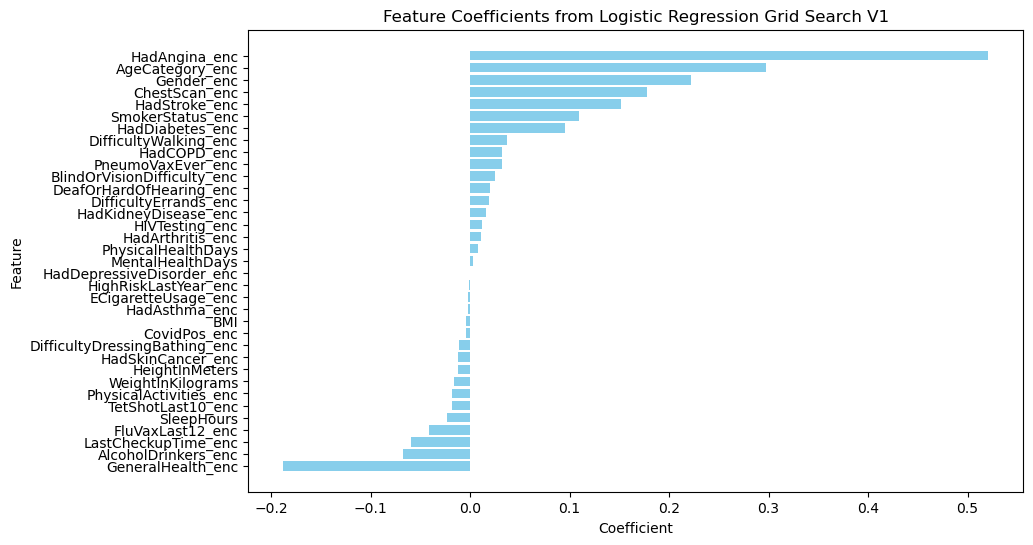

In [152]:
# Extract the logistic regression model from the pipeline
best_lr_logreg_model3 = best_lr_pipe_V1.named_steps['lr']

# Get the coefficients
coeff = best_lr_logreg_model3.coef_[0]

# Create a DataFrame for the coefficients
logreg_coeff3 = pd.DataFrame(coeff, index=X_train.columns, columns=['Coeff'])

# Sort the DataFrame by coefficient values
logreg_coeff3_sorted = logreg_coeff3.sort_values(by='Coeff', ascending=False)
print(logreg_coeff3_sorted)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(logreg_coeff3_sorted.index, logreg_coeff3_sorted['Coeff'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients from Logistic Regression Grid Search V1')
plt.gca().invert_yaxis()  # To display the highest coefficients on top
plt.show()


Pipeline Gridsearch - logreg_model4 (l1)

In [133]:
# Making a pipeline esimator list 
lr_estimators = [('scaler', StandardScaler()),
                    ('lr', LogisticRegression(max_iter=1000, random_state=12))
]

pipe = Pipeline(lr_estimators)
print(pipe) # Checking the pipe has been correctly made

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(max_iter=1000, random_state=12))])


In [134]:
# Defining V3 grid search

C = ([.00000001, .0000001, .000001, .00001, .0001, .001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])

penalty = ['l1']

solver = ['saga', 'liblinear']

params = [dict(
    lr = [LogisticRegression()],
    lr__C = C,
    lr__penalty = penalty,
    lr__solver = solver
)]
display(params)

[{'lr': [LogisticRegression()],
  'lr__C': [1e-08,
   1e-07,
   1e-06,
   1e-05,
   0.0001,
   0.001,
   0.1,
   1,
   10,
   100,
   1000,
   10000,
   100000,
   1000000,
   10000000,
   100000000,
   1000000000],
  'lr__penalty': ['l1'],
  'lr__solver': ['saga', 'liblinear']}]

In [135]:
grid_search_model_V2 = GridSearchCV(estimator= pipe, param_grid=params,cv=5, n_jobs= 4, verbose= 2)
grid_search_model_V2.fit(X_train, y_train)

Fitting 5 folds for each of 34 candidates, totalling 170 fits
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegress

/opt/anaconda3/envs/capstone/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END lr=LogisticRegression(), lr__C=100, lr__penalty=l1, lr__solver=liblinear; total time=   3.6s
[CV] END lr=LogisticRegression(), lr__C=100, lr__penalty=l1, lr__solver=liblinear; total time=   2.8s
[CV] END lr=LogisticRegression(), lr__C=100, lr__penalty=l1, lr__solver=liblinear; total time=   2.8s
[CV] END lr=LogisticRegression(), lr__C=1000, lr__penalty=l1, lr__solver=saga; total time=   1.5s
[CV] END lr=LogisticRegression(), lr__C=1000, lr__penalty=l1, lr__solver=saga; total time=   1.5s
[CV] END lr=LogisticRegression(), lr__C=1000, lr__penalty=l1, lr__solver=saga; total time=   1.5s
[CV] END lr=LogisticRegression(), lr__C=1000, lr__penalty=l1, lr__solver=saga; total time=   1.7s
[CV] END lr=LogisticRegression(), lr__C=1000, lr__penalty=l1, lr__solver=liblinear; total time=   1.1s
[CV] END lr=LogisticRegression(), lr__C=1000, lr__penalty=l1, lr__solver=saga; total time=   1.8s
[CV] END lr=LogisticRegression(), lr__C=1000, lr__penalty=l1, lr__solver=liblinear; total time=   2.8

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=12))]),
             n_jobs=4,
             param_grid=[{'lr': [LogisticRegression(C=0.1, penalty='l1',
                                                    solver='saga')],
                          'lr__C': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                    0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000, 10000000, 100000000, 1000000000],
                          'lr__penalty': ['l1'],
                          'lr__solver': ['saga', 'liblinear']}],
             verbose=2)

In [136]:
# Extracting the essential information 

# Result of the grid search optimisation process - best hyperparameter and best model
print('Best Score:', grid_search_model_V2.best_score_); 
print('Best C Value:', grid_search_model_V2.best_estimator_.get_params()['lr__C'])
print('Best lr Model:', grid_search_model_V2.best_estimator_.get_params()['lr'])
print('Best penalty:', grid_search_model_V2.best_estimator_.get_params()['lr__penalty'])
print('Best solver:', grid_search_model_V2.best_estimator_.get_params()['lr__solver'])

Best Score: 0.9482985532551205
Best C Value: 0.1
Best lr Model: LogisticRegression(C=0.1, penalty='l1', solver='saga')
Best penalty: l1
Best solver: saga


In [141]:
best_lr_pipe_V2 = grid_search_model_V2.best_estimator_

In [142]:
best_lr_pipe_V2.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [143]:
# Making the train and test predictions for the pipeed decision tree model
y_train_blrpipe_pred_V2 = best_lr_pipe_V2.predict(X_train)
y_test_blrpipe_pred_V2 = best_lr_pipe_V2.predict(X_test)

In [144]:
# Obtaining the best score on the train and test data for the best pipe model
print(f'Score on train: {best_lr_pipe_V2.score(X_train, y_train)}')
print(f'Score on test: {best_lr_pipe_V2.score(X_test, y_test)}')

Score on train: 0.9483239584762427
Score on test: 0.9480701611755858


V2 Train Metrics

In [146]:
# Classification Report (accuracy, precision, recall, f1)
report_blrpipe_train_V2 = classification_report(y_train, y_train_blrpipe_pred_V2)
print(report_blrpipe_train_V2)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97    186055
         1.0       0.56      0.25      0.34     10748

    accuracy                           0.95    196803
   macro avg       0.76      0.62      0.66    196803
weighted avg       0.94      0.95      0.94    196803



[[183964   2091]
 [  8079   2669]]


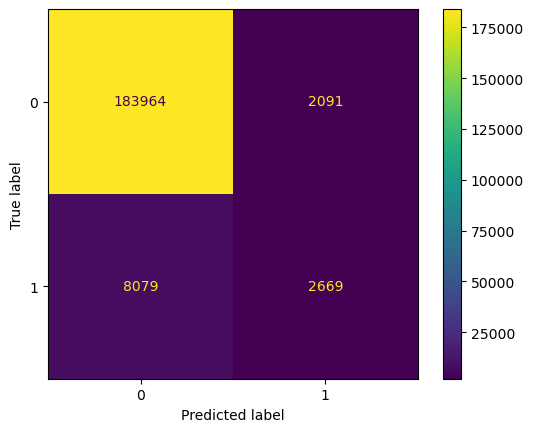

In [147]:
# Confusion Matrix (table + plot)
cm_blrpipe_train_V2 = confusion_matrix(y_train, y_train_blrpipe_pred_V2)
print(cm_blrpipe_train_V2)
ConfusionMatrixDisplay(confusion_matrix=cm_blrpipe_train_V2).plot();

V2 Test Metrics

In [148]:
# Classification Report (accuracy, precision, recall, f1)
report_blrpipe_test_V2 = classification_report(y_test, y_test_blrpipe_pred_V2)
print(report_blrpipe_test_V2)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     46514
         1.0       0.56      0.24      0.34      2687

    accuracy                           0.95     49201
   macro avg       0.76      0.62      0.66     49201
weighted avg       0.94      0.95      0.94     49201



[[45993   521]
 [ 2034   653]]


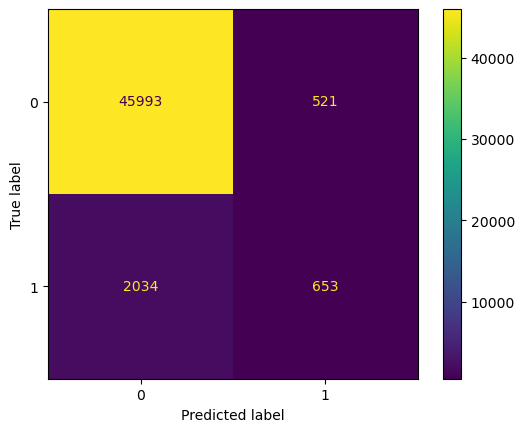

In [149]:
# Confusion Matrix (table + plot)
cm_blrpipe_test_V2 = confusion_matrix(y_test, y_test_blrpipe_pred_V2)
print(cm_blrpipe_test_V2)
ConfusionMatrixDisplay(confusion_matrix=cm_blrpipe_test_V2).plot();

                                  Coeff
AgeCategory_enc                0.614441
HadAngina_enc                  0.582689
Gender_enc                     0.357589
ChestScan_enc                  0.276937
SmokerStatus_enc               0.176950
HadStroke_enc                  0.173004
HadDiabetes_enc                0.115851
HIVTesting_enc                 0.038674
BlindOrVisionDifficulty_enc    0.029119
DifficultyWalking_enc          0.026444
DifficultyErrands_enc          0.024868
PneumoVaxEver_enc              0.023156
HadCOPD_enc                    0.018381
HadDepressiveDisorder_enc      0.015737
MentalHealthDays               0.013348
HadArthritis_enc               0.012042
HadAsthma_enc                  0.010328
HadKidneyDisease_enc           0.007851
ECigaretteUsage_enc            0.007572
DeafOrHardOfHearing_enc        0.006012
BMI                            0.005144
HighRiskLastYear_enc           0.003614
CovidPos_enc                   0.001597
WeightInKilograms              0.000000


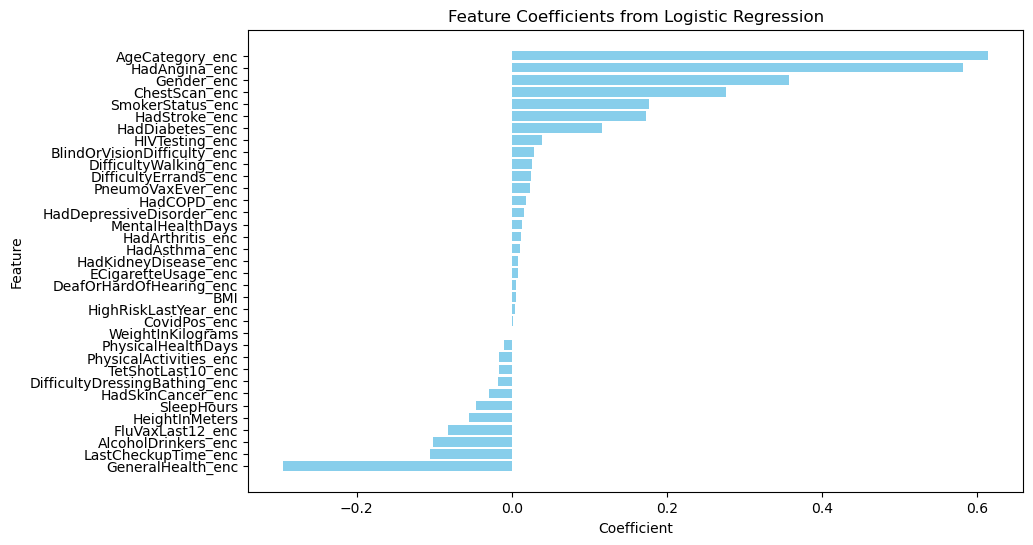

In [153]:
# Extract the logistic regression model from the pipeline
best_lr_logreg_model_V2 = best_lr_pipe_V2.named_steps['lr']

# Get the coefficients
coeff = best_lr_logreg_model_V2.coef_[0]

# Create a DataFrame for the coefficients
logreg_coeff4 = pd.DataFrame(coeff, index=X_train.columns, columns=['Coeff'])


# Sort the DataFrame by coefficient values
logreg_coeff4_sorted = logreg_coeff4.sort_values(by='Coeff', ascending=False)
print(logreg_coeff4_sorted)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(logreg_coeff4_sorted.index, logreg_coeff4_sorted['Coeff'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients from Logistic Regression')
plt.gca().invert_yaxis()  # To display the highest coefficients on top
plt.show()

#### Final Logistic Regression Model

In [ ]:
# Optimise with the best Parameters from the best logreg model

final_model = LogisticRegression(C=,random_state=)

# Remember that X_remainder and y_remainder held the data I split into train and validation
# I can use that data to re-train my model
final_model.fit(,)

final_model.score(X_test, y_test)

#### Model - Decision Tree

In [154]:
# Pre-processing - scale the data
scaler = StandardScaler()
scaler.fit(X_train)

# Transform the data
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [196]:
#Instantiate
dt_model = DecisionTreeClassifier(random_state= 12, max_depth= 10, min_samples_split= 5, min_samples_leaf= 2)

# Fit Model
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=12)

In [190]:
# Make predictions
y_train_pred_dt = dt_model.predict(X_train_scaled)
y_val_pred_dt = dt_model.predict(X_val_scaled)
y_test_pred_dt = dt_model.predict(X_test_scaled)

In [191]:
# Decision Tree Train Score
train_accuracy = accuracy_score(y_train, y_train_pred_dt)
print(f"Train Accuracy: {train_accuracy}")

# Decision Tree Validation Score
val_accuracy = accuracy_score(y_val, y_val_pred_dt)
print(f"Validation Accuracy: {val_accuracy}")

# Decision Tree Test Score
test_accuracy = accuracy_score(y_test, y_test_pred_dt)
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.9536287556592125
Validation Accuracy: 0.9529483498894845
Test Accuracy: 0.9464035283835694


Train DT

In [192]:
# Train Classification Report
print(classification_report(y_train, y_train_pred_dt))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    186055
         1.0       0.65      0.32      0.43     10748

    accuracy                           0.95    196803
   macro avg       0.81      0.66      0.70    196803
weighted avg       0.95      0.95      0.95    196803



<Figure size 800x600 with 0 Axes>

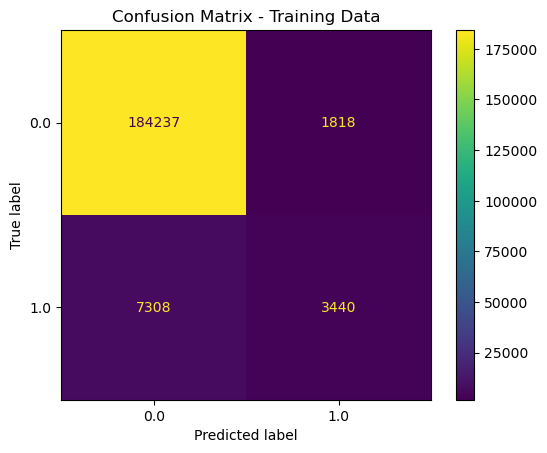

In [183]:
# Train Confusion Matrix
cm_dt_train = confusion_matrix(y_train, y_train_pred_dt)

# Display confusion matrix for training data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_dt_train, display_labels=dt_model.classes_)
plt.figure(figsize=(8, 6))
disp_train.plot()
plt.title('Confusion Matrix - Training Data')
plt.show()

In [193]:
# Validation Classification Report
print(classification_report(y_val, y_val_pred_dt))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     37211
         1.0       0.64      0.32      0.42      2150

    accuracy                           0.95     39361
   macro avg       0.80      0.65      0.70     39361
weighted avg       0.94      0.95      0.95     39361



Validation DT

<Figure size 800x600 with 0 Axes>

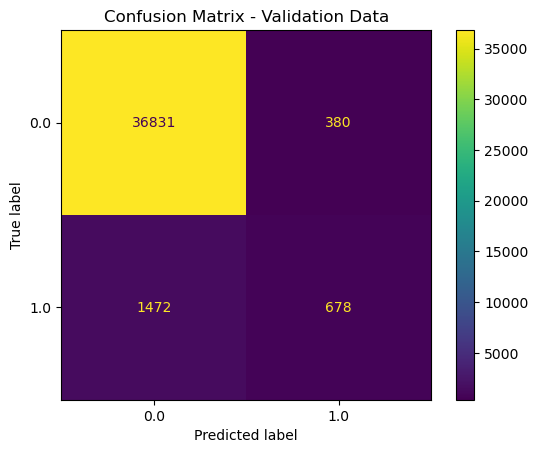

In [175]:
# Validation Confusion Matrix
cm_dt_val = confusion_matrix(y_val, y_val_pred_dt)

# Display confusion matrix for validation data
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_dt_val, display_labels=dt_model.classes_)
plt.figure(figsize=(8, 6))
disp_val.plot()
plt.title('Confusion Matrix - Validation Data')
plt.show()

Test DT

In [195]:
# Train Classification Report
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     46514
         1.0       0.52      0.26      0.34      2687

    accuracy                           0.95     49201
   macro avg       0.74      0.62      0.66     49201
weighted avg       0.93      0.95      0.94     49201



<Figure size 800x600 with 0 Axes>

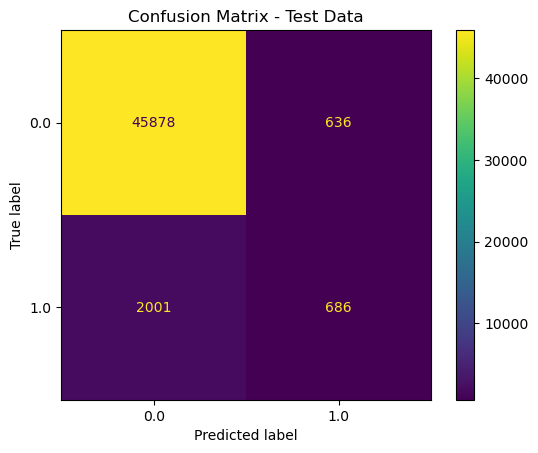

In [176]:
# Test Confusion Matrix
cm_dt_test = confusion_matrix(y_test, y_test_pred_dt)

# Display confusion matrix for test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_dt_test, display_labels=dt_model.classes_)
plt.figure(figsize=(8, 6))
disp_test.plot()
plt.title('Confusion Matrix - Test Data')
plt.show()

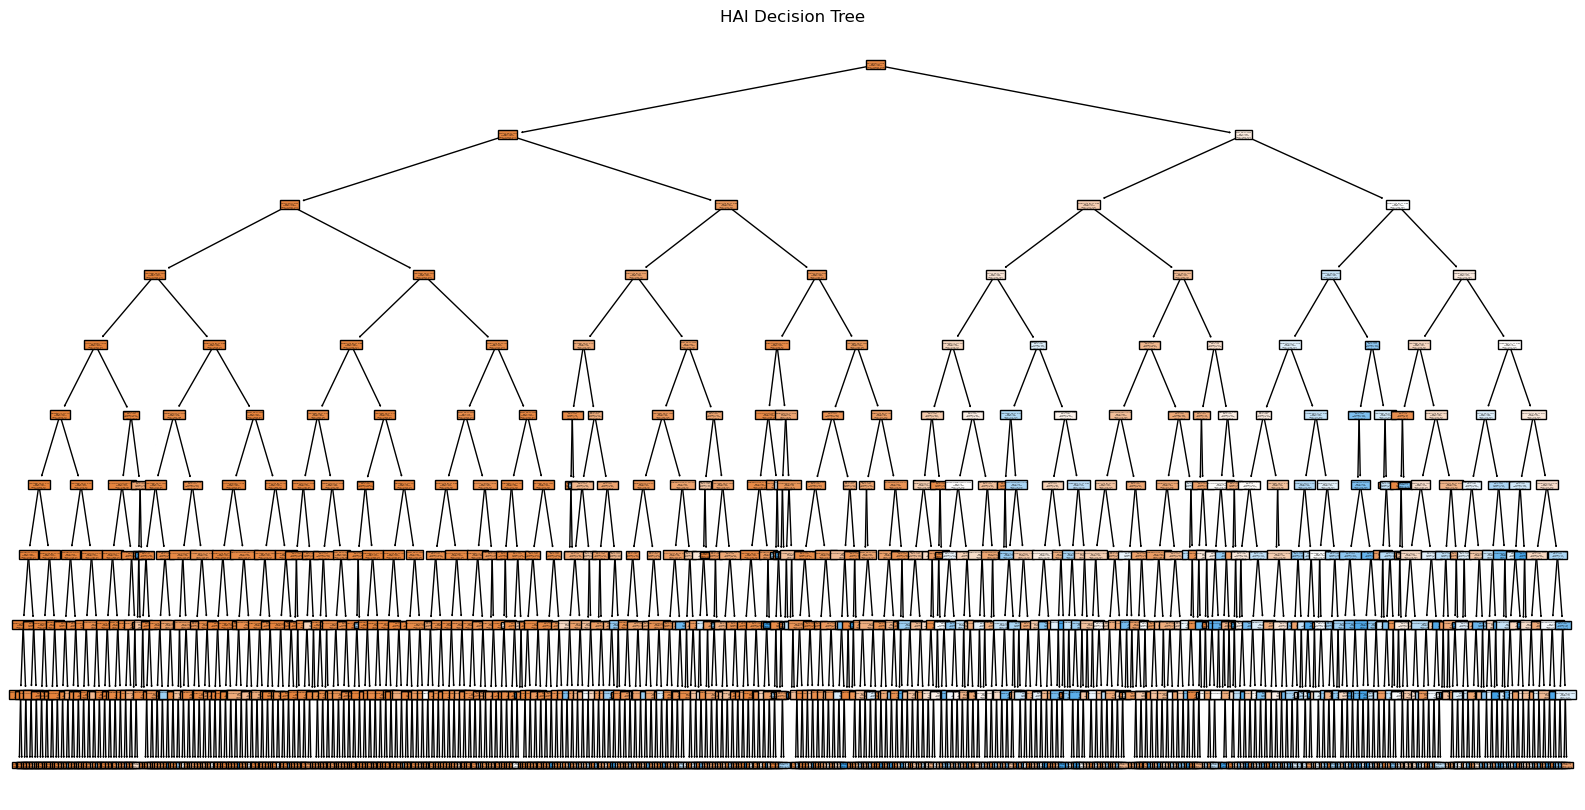

In [185]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'])
plt.title("HAI Decision Tree")
plt.show()

In [208]:
# Get feature importances
feature_importances = dt_model.feature_importances_

# Get feature names
feature_names = X_train.columns

dt_feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

dt_feature_importance_df = dt_feature_importance_df.sort_values(by='Importance', ascending=False)
print(dt_feature_importance_df)

                          Feature  Importance
16                  HadAngina_enc    0.663870
17                  HadStroke_enc    0.038768
5                             BMI    0.036639
8               GeneralHealth_enc    0.033836
12                AgeCategory_enc    0.028405
4               WeightInKilograms    0.024997
7                      Gender_enc    0.019501
29                  ChestScan_enc    0.017640
3                  HeightInMeters    0.016616
10               SmokerStatus_enc    0.014503
2                      SleepHours    0.013456
0              PhysicalHealthDays    0.013128
1                MentalHealthDays    0.009981
14                HadDiabetes_enc    0.006401
30            AlcoholDrinkers_enc    0.006325
9          PhysicalActivities_enc    0.004982
26          DifficultyWalking_enc    0.004592
11            ECigaretteUsage_enc    0.003686
25    BlindOrVisionDifficulty_enc    0.003478
28          DifficultyErrands_enc    0.003405
22           HadKidneyDisease_enc 

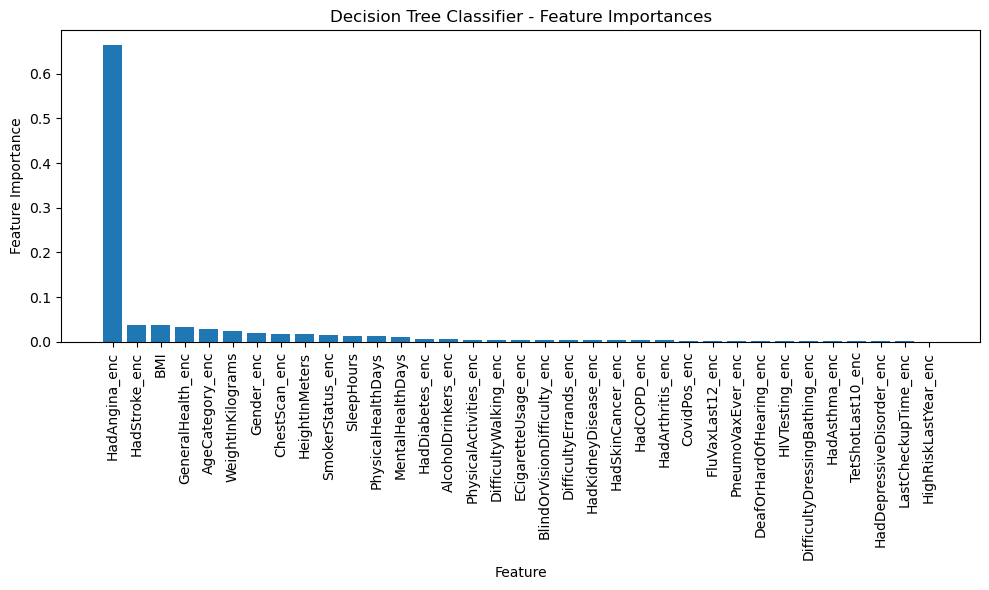

In [209]:
# Get feature importances
feature_importances = dt_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Decision Tree Classifier - Feature Importances')
plt.tight_layout()
plt.show()


#### Model - Random Forest

Grid Search - Random Forest

In [210]:
# Making a pipeline esimator list 
PCA_rf_estimators = [('scaler', StandardScaler()),
                    ('rf', RandomForestClassifier(random_state=12))
]

pipe = Pipeline(PCA_rf_estimators)
print(pipe) # Checking the pipe has been correctly made

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=12))])


In [211]:
# Defining rf V1 grid search

n_estimators = [5, 10, 20]
max_depth = [1, 2, 3, 4]
# min_samples_split = [2, 5]
# min_samples_leaf = [5, 10]
max_features = ['sqrt', 'log2']

params = dict(
    rf = [RandomForestClassifier()],
    rf__n_estimators = n_estimators,
    rf__max_depth = max_depth,
    # rf__min_samples_split = min_samples_split,
    # rf__min_samples_leaf = min_samples_leaf,
    rf__max_features = max_features
)
display(params)

{'rf': [RandomForestClassifier()],
 'rf__n_estimators': [5, 10, 20],
 'rf__max_depth': [1, 2, 3, 4],
 'rf__max_features': ['sqrt', 'log2']}

In [212]:
grid_search_model_rf_V1 = GridSearchCV(estimator= pipe, param_grid=params, cv=5, n_jobs= 4, verbose= 2)
grid_search_model_rf_V1.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END rf=RandomForestClassifier(), rf__max_depth=1, rf__max_features=sqrt, rf__n_estimators=5; total time=   0.2s
[CV] END rf=RandomForestClassifier(), rf__max_depth=1, rf__max_features=sqrt, rf__n_estimators=5; total time=   0.2s
[CV] END rf=RandomForestClassifier(), rf__max_depth=1, rf__max_features=sqrt, rf__n_estimators=5; total time=   0.2s
[CV] END rf=RandomForestClassifier(), rf__max_depth=1, rf__max_features=sqrt, rf__n_estimators=5; total time=   0.2s
[CV] END rf=RandomForestClassifier(), rf__max_depth=1, rf__max_features=sqrt, rf__n_estimators=5; total time=   0.2s
[CV] END rf=RandomForestClassifier(), rf__max_depth=1, rf__max_features=sqrt, rf__n_estimators=10; total time=   0.2s
[CV] END rf=RandomForestClassifier(), rf__max_depth=1, rf__max_features=sqrt, rf__n_estimators=10; total time=   0.3s
[CV] END rf=RandomForestClassifier(), rf__max_depth=1, rf__max_features=sqrt, rf__n_estimators=10; total time=   0.3s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=12))]),
             n_jobs=4,
             param_grid={'rf': [RandomForestClassifier(max_depth=4,
                                                       max_features='sqrt',
                                                       n_estimators=5)],
                         'rf__max_depth': [1, 2, 3, 4],
                         'rf__max_features': ['sqrt', 'log2'],
                         'rf__n_estimators': [5, 10, 20]},
             verbose=2)

In [213]:
# Extracting the essential information 

# Result of the grid search optimisation process - best hyperparameter and best model
print('Best Score:', grid_search_model_rf_V1.best_score_); 
print('Best Max Depth:', grid_search_model_rf_V1.best_estimator_.get_params()['rf__max_depth'])
print('Best Max Features:', grid_search_model_rf_V1.best_estimator_.get_params()['rf__max_features'])
print('Best Min Samples Leaf:', grid_search_model_rf_V1.best_estimator_.get_params()['rf__min_samples_leaf'])
print('Best Min Samples Split:', grid_search_model_rf_V1.best_estimator_.get_params()['rf__min_samples_split'])
print('Best n estimators:', grid_search_model_rf_V1.best_estimator_.get_params()['rf__n_estimators'])

Best Score: 0.9458494009897542
Best Max Depth: 4
Best Max Features: sqrt
Best Min Samples Leaf: 1
Best Min Samples Split: 2
Best n estimators: 5


In [214]:
best_rf1 = grid_search_model_rf_V1.best_estimator_

In [ ]:
from sklearn import tree

tree.plot_tree(grid_search_model_rf_V1.best_estimator_.estimators_)

Random Forest 2 Model 4

#### Best Grid Search Model